# New section

# $\color{orange}{\text{Jupyter notebook bij Hoofdstuk 3 van Kwantummechanica 1}}$

Jan Ryckebusch, November 2016

Inspired on the Program written by Mark Newman
Explained in his wonderful book "Computational Physics"
Chapter 8.6.3 "eigenvalue problems"

 Numerical methods used:
- Runge-Kutta method to solve second-order ODE (the TISE)
  - secant method to find the roots of a nonlinear equation (f(E)=0)
  (secant method is connected with the Newton-Raphson method)
            
  - trapezium rule for computing the integral $\int d x \mid \psi (x) \mid ^2$ (used to normalize the wave function)
         

 This program solves the TISE for the following potentials:

  

1.   iopt=0: $V(x) =0$ for $0 \le x \le L$ and $\infty$ for other values of $x$
2.   iopt=1: $V(x)= V_0 (x/L) (x/L-1)$ for $0 \le x \le L$ and $+ \infty$ for other values of $x$; $L$ is the Bohr radius, and $m$ the mass of an electron  


 Version 0: ground-state and excitation energies + corresponding wavefunctions

 Extensions: other potentials like $V(x)=1/2 k x^2 $, $V(x) = - \frac {V_0}  
 {(1+(x/a)^2)}$


In [1]:
# load some modules used
import numpy as np  # module numpy contains a lot of goodies
import pylab as plt # module pylab allows one to make figures ...

In [2]:
# Constants in kg . m . s
#    variables are global ...
m = 9.1094e-31     # Mass of electron
hbar = 1.0546e-34  # Planck's constant over 2*pi
e = 1.6022e-19     # Electron charge (defines energy eV)
L = 5.2918e-11     # Bohr radius in m
#
N = 2000           # number of equidistant points for which the ODE is solved
h = L/N
#V0=1000*e
V0=220*e

In [3]:
#############################################################
# Potential functions
# First option: an infinite well between 0 and L
# Second option: a potential that is V_0 * (x/L) * (x/L -1) for x between 0 and L
#      and infinity for other values of x
#iopt=int(input(" Input: 0 for infinite well, 1 for nonzero Epot in well  "))
def V(iopt,x):
    if iopt==0:
        return 0.0
    elif iopt==1:
        return V0*(x/L)*(x/L-1.)
#############################################################
# the function 2m/\hbar**2 * [ V(x) - E ]
def f(r,x,E):
    psi = r[0]
    phi = r[1]
    fpsi = phi
    fphi = (2*m/hbar**2)*(V(iopt,x)-E)*psi
    return np.array([fpsi,fphi],float)

In [4]:
#############################################################
# Calculate wavefunction for particular energy E and given potential
#  Not all values E lead to physically acceptable wave functions
def solve(E):
    wavefunc=[] # list with solution of TISE at energy E
    xrange=[]   # list of x-values for which wavefunction is computed
    psi = 0.0
    phi = 1.0
    r = np.array([psi,phi],float)
# solve the second-order ODE with the Runge-Kutta method
    for x in np.arange(0,L,h):
        wavefunc.append(r[0])
        xrange.append(x)
        k1 = h*f(r,x,E)
        k2 = h*f(r+0.5*k1,x+0.5*h,E)
        k3 = h*f(r+0.5*k2,x+0.5*h,E)
        k4 = h*f(r+k3,x+h,E)
        r += (k1+2*k2+2*k3+k4)/6
# r[0] is the wavefunction at the largest x point
# r[1] is the derivative of the wavefunction at the largest x point
    return r[0],r[1],xrange,wavefunc

#############################################################


In [5]:
#############################################################
# This function solves the TISE at given E and plots the normalized
#      wavefunction
def solve_and_plot(E,thetitle):
    psi2,dpsi2,xrange,wavefunction = solve(E)
# normalize the wavefunction: integration with the simple trapezium method
# the wave function is 0 at x =0 and x =L
    integral=0.
    for ii in range(len(xrange)):
        integral += (wavefunction[ii])**2
    integral *= h
    print("The integral of squared wavefunction= ", integral)
    wavefunction = wavefunction / (integral**0.5)
    zeroes=[0.*x for x in xrange]
    plt.xlabel('x coordinate [m]')
    plt.ylabel('the normalized  wavefunction $\Psi(x)$ [m$^-1/2$]')
    plt.title(thetitle)
    plt.plot(xrange, wavefunction, 'r-',xrange, zeroes, 'b--')
    plt.show()

#############################################################

<>:16: SyntaxWarning: invalid escape sequence '\P'
<>:16: SyntaxWarning: invalid escape sequence '\P'
/var/folders/9s/8sbwt7bs0m15y39npx_sphrc0000gn/T/ipykernel_82100/4052692225.py:16: SyntaxWarning: invalid escape sequence '\P'
  plt.ylabel('the normalized  wavefunction $\Psi(x)$ [m$^-1/2$]')


In [6]:
#############################################################
#
#  Function to find the energy eigenvalues using the secant method
#  secant method is a numerical method to solve the equation f(E)=0
#   a root finding method for nonlinear equations f(E)=0
#   f(E) is the value of \psi(x=L) as a function of E
#
#  after seeking the energy eigenvalue a plot is created with f(E) versus E
#
def SeektheE(E1,E2,target):
    List_of_Energies=[]
    List_of_PsiatL=[]
# psi2 is the wavefunction at x=L for energy E
    psi2,dspi2,xrange,wavefunction = solve(E1)
#
    List_of_Energies.append(E1)
    List_of_PsiatL.append(psi2)
    while abs(E1-E2)>target:
        print(' New estimate for the energy (in eV)', E2/e)
        psi1,psi2,dpsi2 = psi2,solve(E2)[0],solve(E2)[1]
        print(' Wavefunction and its derivative at x=L : ',psi2,dpsi2)
        List_of_Energies.append(E2)
        List_of_PsiatL.append(psi2)
        E1,E2 = E2,E2-psi2*(E2-E1)/(psi2-psi1)
# the value of \psi (x =L) as a function of the energy
#
    Energies_eV= [x/e for x in List_of_Energies] # energies in eV
    plt.xlabel(' Energy (eV)')
    plt.ylabel(' The unnormalized wavefunction $\Psi(x=L)$')
    plt.plot(Energies_eV, List_of_PsiatL, 'r^')
    plt.show()
    return E2
#############################################################


<>:29: SyntaxWarning: invalid escape sequence '\P'
<>:29: SyntaxWarning: invalid escape sequence '\P'
/var/folders/9s/8sbwt7bs0m15y39npx_sphrc0000gn/T/ipykernel_82100/2480060826.py:29: SyntaxWarning: invalid escape sequence '\P'
  plt.ylabel(' The unnormalized wavefunction $\Psi(x=L)$')


############################################################
 Start of the search for the ground-state energy:
############################################################
 New estimate for the energy (in eV) 1.0
 Wavefunction and its derivative at x=L :  5.227216157943892e-11 0.96347617570212
 New estimate for the energy (in eV) 81.9369029706323
 Wavefunction and its derivative at x=L :  1.3686307647112604e-11 -0.7727729765381236
 New estimate for the energy (in eV) 110.64502372398819
 Wavefunction and its derivative at x=L :  5.304921215782782e-12 -0.9582670771486995
 New estimate for the energy (in eV) 128.81556389625035
 Wavefunction and its derivative at x=L :  1.11125698835433e-12 -0.9979103077913782
 New estimate for the energy (in eV) 133.63047960088252
 Wavefunction and its derivative at x=L :  1.2970720466904513e-13 -0.9999704966657387
 New estimate for the energy (in eV) 134.26674815001317
 Wavefunction and its derivative at x=L :  3.866933379051228e-15 -0.9999999736528977
 

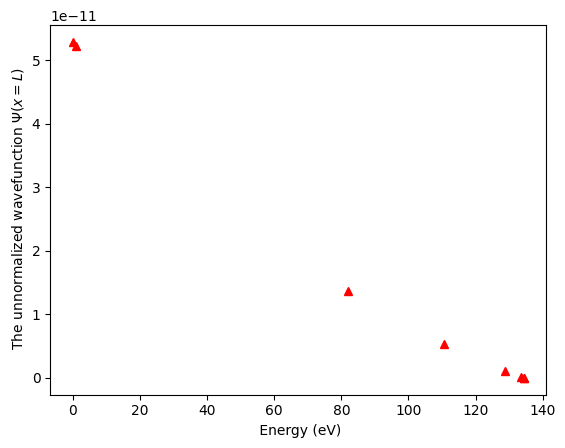


 Result for E(ground state) (in eV)= 134.28637169348673
The integral of squared wavefunction=  7.507243885138393e-33


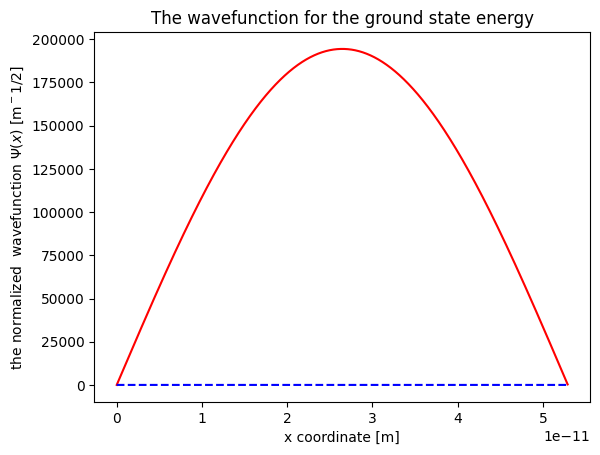

The integral of squared wavefunction=  1.826719098594714e-32


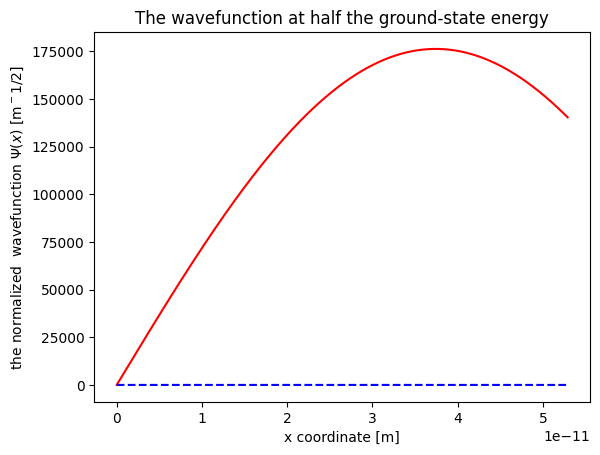

############################################################
Start of the search for the energy of excited states 
############################################################
 New estimate for the energy (in eV) 403.8591150804601
 Wavefunction and its derivative at x=L :  -7.2004799123050434e-12 0.6711495683570986
 New estimate for the energy (in eV) 540.1824825171338
 Wavefunction and its derivative at x=L :  1.4895875903168725e-13 0.999842696743693
 New estimate for the energy (in eV) 537.4194742727649
 Wavefunction and its derivative at x=L :  1.3491054633789333e-14 0.9999987163800703
 New estimate for the energy (in eV) 537.1443098315863
 Wavefunction and its derivative at x=L :  -5.797614114715848e-17 0.9999999999762924
 New estimate for the energy (in eV) 537.1454872569494
 Wavefunction and its derivative at x=L :  2.2203117110450305e-20 0.9999999999999865


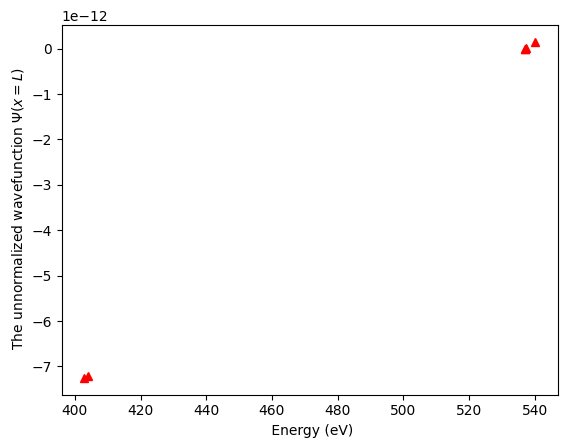

 
 E(first excited state) in eV = 537.1454868062035
The integral of squared wavefunction=  1.8768109711169508e-33


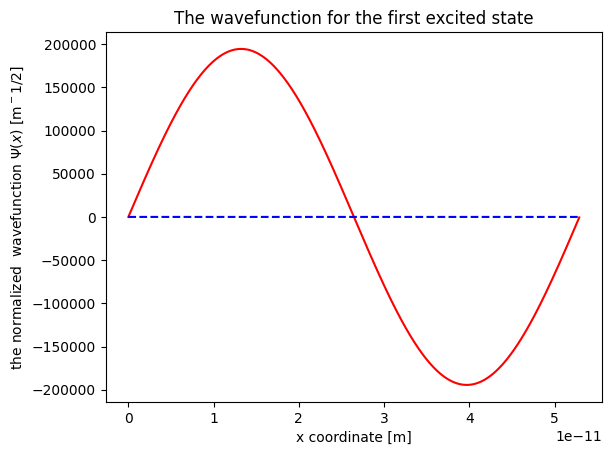

The integral of squared wavefunction=  3.149001062045585e-33


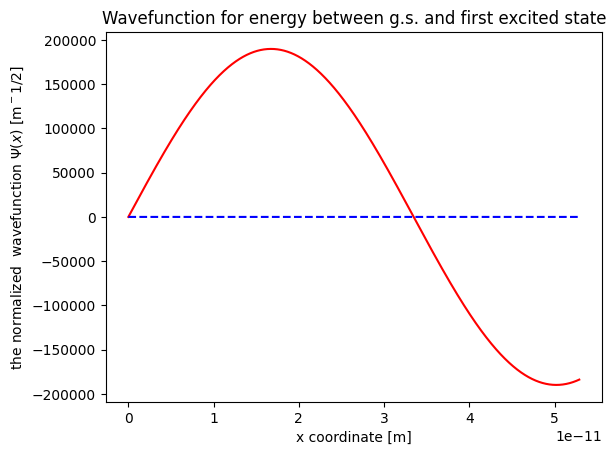

 New estimate for the energy (in eV) 1075.290973612407
 Wavefunction and its derivative at x=L :  3.034250692086957e-12 -0.8603311270901617
 New estimate for the energy (in eV) 1209.7266976561282
 Wavefunction and its derivative at x=L :  -2.5144388713936726e-14 -0.9999899630310316
 New estimate for the energy (in eV) 1208.6218046909771
 Wavefunction and its derivative at x=L :  -9.73307988875678e-16 -0.9999999849745878
 New estimate for the energy (in eV) 1208.5773134594072
 Wavefunction and its derivative at x=L :  6.9755605026242815e-19 -0.9999999999998428


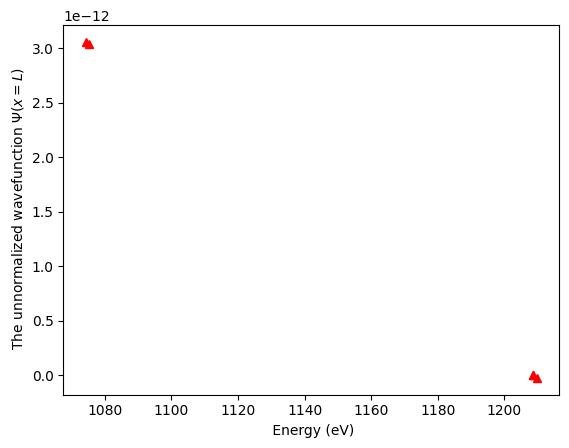

 
 E(second excited state) in eV = 1208.5773453228067
The integral of squared wavefunction=  8.34138209378786e-34


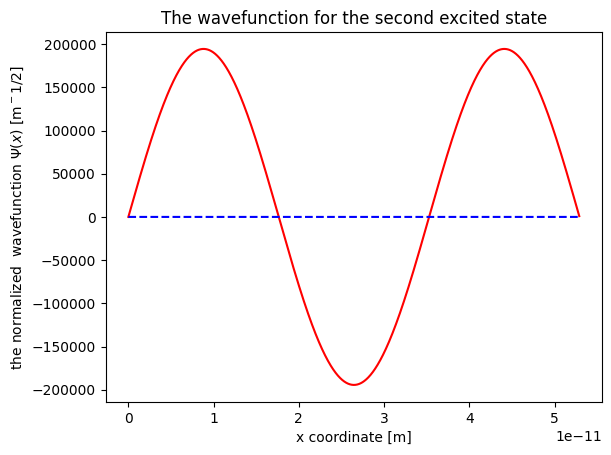

The integral of squared wavefunction=  1.176465422695021e-33


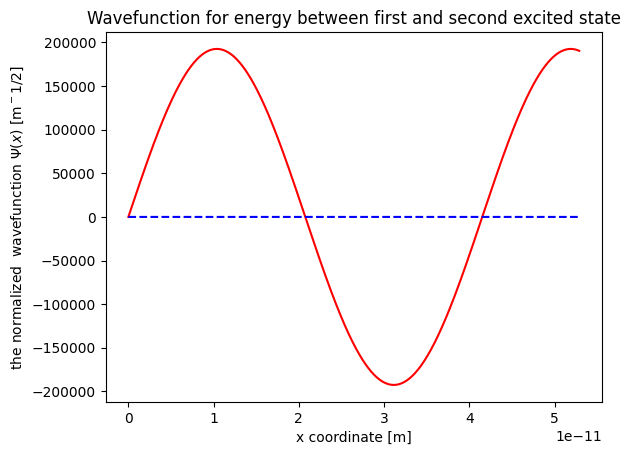

In [7]:
#############################################################
# Main program
iopt=int(0) # int(input(" Input: 0 for infinite well, 1 for nonzero Epot in well  "))
target = e/5000  # required accuracy (e is eV)
# Search for the energy of the ground state
print('#' * 60)
print(' Start of the search for the ground-state energy:')
print('#' * 60)
E1 = 0.0
E2 = e
E2=SeektheE(E1,E2,target)
# print the result
print("\n Result for E(ground state) (in eV)=",E2/e)
# compute once more the wavefunction for the ground state and plot the result
thetitle="The wavefunction for the ground state energy"
solve_and_plot(E2,thetitle)
# compute the wavefunction at half the ground state energy
#  the TISE can be solved but the solution is not physical
thetitle="The wavefunction at half the ground-state energy"
solve_and_plot(E2/2.,thetitle)
# proceed with the first excited state
#
print('#' * 60)
print('Start of the search for the energy of excited states ')
print('#' * 60)
# first excited state .....
Egs = E2
E1 = Egs+2.*abs(Egs)
# E2 = E1 + 5.*e
E2=E1+e
E2=SeektheE(E1,E2,target)
# print the result
print(' \n E(first excited state) in eV =', E2/e)
##########################################################################
# compute once more the wavefunction
#      for the first excited state and plot the result
thetitle="The wavefunction for the first excited state"
solve_and_plot(E2,thetitle)
# compute the wavefunction at an energy half between the ground state energy
#    and the energy of the first excited state
#  the TISE can be solved but the solution is not physical
thetitle="Wavefunction for energy between g.s. and first excited state"
solve_and_plot((E2+Egs)/2.,thetitle)
# second excited state .....
Eex1 = E2
E1 = Eex1+abs(Eex1)
# E2 = E1 + 5.*e
E2=E1+e
E2=SeektheE(E1,E2,target)
# print the result
print(' \n E(second excited state) in eV =', E2/e)
##########################################################################
# compute once more the wavefunction
#      for the second excited state and plot the result
thetitle="The wavefunction for the second excited state"
solve_and_plot(E2,thetitle)
# compute the wavefunction at an energy half between the energy
#    of the first and second excited state
#  the TISE can be solved but the solution is not physical
thetitle="Wavefunction for energy between first and second excited state"
solve_and_plot((E2+Eex1)/2.,thetitle)
